# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 8-9: Graph theory
## 04.19.2019

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import statistics

sns.set_style(style='whitegrid')

image_path = '.\\Documentation\\src\\images\\'
image_format = 'pdf'
image_dpi = 150

# Random Recursive Tree

In [159]:
def random_recursive_tree(n_edges_rrt):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    graph_rrt = np.zeros((n_edges_rrt), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the (N+1)th point
    count_rrt = np.zeros((n_edges_rrt), dtype='int')
    
    for i in range(0, n_edges_rrt):
        
        # Choose randomly an endpoint for the edge, brought into the graph by the new vertex
        choosen_random = random.randint(1,i+1)
        graph_rrt[i] = choosen_random
        
        # Increment the degrees of the two connected point
        count_rrt[choosen_random-1] += 1
        count_rrt[i] += 1
        
    return(graph_rrt, count_rrt)

In [160]:
n_edges_rrt = 100
graph_rrt, count_rrt = random_recursive_tree(n_edges_rrt)

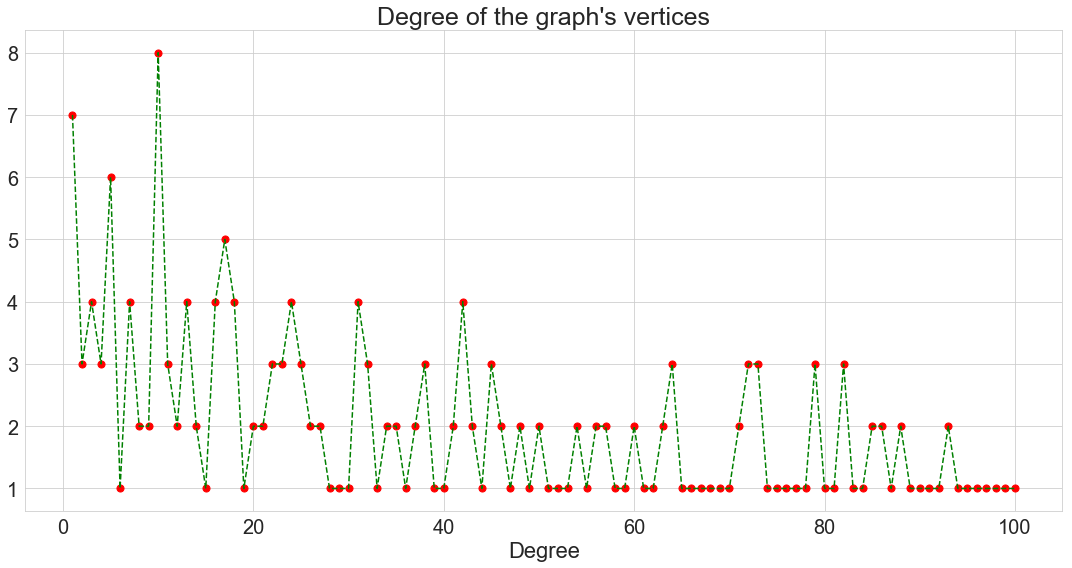

In [161]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes.scatter([k for k in range(1,n_edges_rrt+1)],
             count_rrt, color='red', s=scattersize)

axes.plot([k for k in range(1,n_edges_rrt+1)],
          count_rrt, color='green', linestyle='--')

axes.set_title('Degree of the graph\'s vertices', fontsize=titlesize)

axes.set_xlabel('Vertices', fontsize=axislabelsize)
axes.set_xlabel('Degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()

# Anti-Preferential Attachment (Anti-Barabási-Albert model)

In [224]:
def anti_pref_graph(n_edges_apg):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    graph_apg = np.zeros((n_edges_apg), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the (N+1)th point
    count_apg = np.zeros((n_edges_apg), dtype='int')
    
    # Total number of vertices with specific degrees
    dist_apg = np.zeros((n_edges_apg), dtype='int')
    
    # Initial conditions:
    # 2 points, with 1 connected edge
    graph_apg[0] = 1
    count_apg[0] = 1
    count_apg[1] = 1
    dist_apg[0] = n_edges_apg-2
    dist_apg[1] = 2

    count_edges = 1
    while(count_edges < 100):
        
        # Choose an endpoint for the edge, brought into the graph by the new vertex
        # Anti-preferencial attachment process
        choosen_random = random.randint(1, count_edges+1)
        
        # Degree of choosen point
        choosen_degree = float(count_apg[choosen_random - 1])
        
        print('current edges: {0}'.format(count_edges))
        
        # Norm factor
        # A = sum_(l=1)^(N) l^(-2) * N_l
        A_norm = np.sum([dist_apg[k]*k**(-2) for k in range(1, n_edges_apg)])
        
        # Transistions rate
        # w_k = k^(-2) / A
        w_current = choosen_degree**(-2) / A_norm
        
        if(w_current > random.random()):

            graph_apg[count_edges] = choosen_random

            # Increment the degrees of the two connected point
            count_apg[choosen_random - 1] += 1
            count_apg[count_edges] += 1
            
            print('rand-1: {0}, count: {1}'.format(count_apg[choosen_random - 1], count_apg[count_edges]))
            
            # Update distributions
            dist_apg[count_apg[choosen_random - 1]] += 1
            dist_apg[count_apg[count_edges]] += 1
            dist_apg[count_apg[choosen_random - 1] - 1] -= 1
            dist_apg[count_apg[count_edges] - 1] -= 1
            
            # Increment total number of edges
            count_edges += 1

    return(graph_apg, count_apg, dist_apg)

In [225]:
n_edges_apg = 100
graph_apg, count_apg, dist_apg = anti_pref_graph(n_edges_apg)

current edges: 1
rand-1: 3, count: 3
current edges: 2
current edges: 2


ZeroDivisionError: 0.0 cannot be raised to a negative power

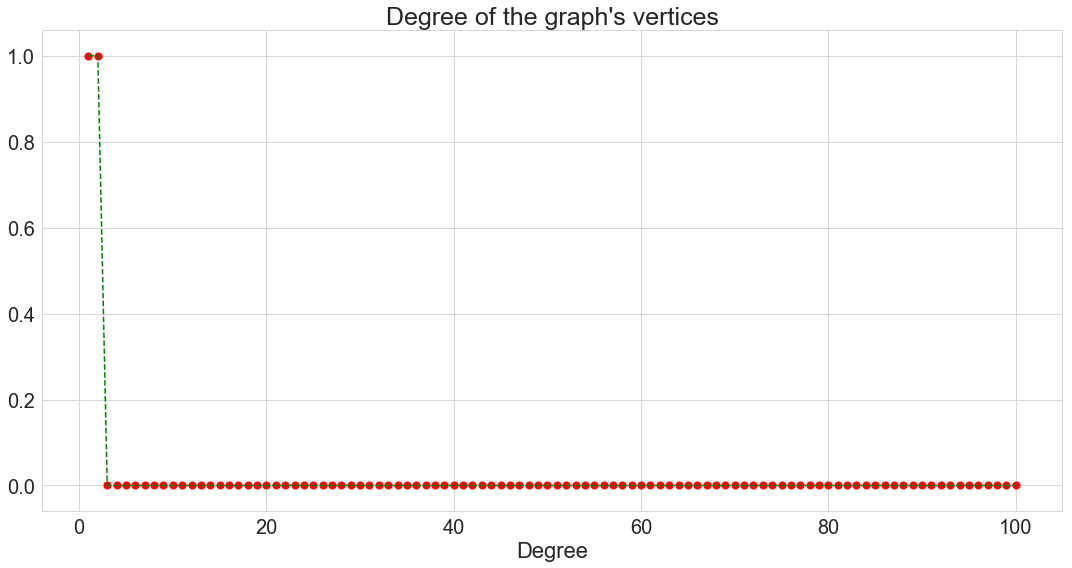

In [166]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes.scatter([k for k in range(1,n_edges_apg+1)],
             count_apg, color='red', s=scattersize)

axes.plot([k for k in range(1,n_edges_apg+1)],
          count_apg, color='green', linestyle='--')

axes.set_title('Degree of the graph\'s vertices', fontsize=titlesize)

axes.set_xlabel('Vertices', fontsize=axislabelsize)
axes.set_xlabel('Degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()